## SciPy를 이용한 확률 분포 분석

- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지다. SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공한다.
- 확률 분포 객체를 생성하는 명령에는 다음과 같은 것들이 있다.
```
종류	이름	확률 분포
이산	bernoulli	베르누이 분포
이산	binom	이항 분포
이산	multinomial	다항 분포
연속	uniform	균일 분포
연속	norm	가우시안 정규 분포
연속	beta	베타 분포
연속	gamma	감마 분포
연속	t	스튜던트 t 분포
연속	chi2	카이 제곱 분포
연속	f	F 분포
연속	dirichlet	디리클리 분포
연속	multivariate_normal	다변수 가우시안 정규 분포
```

In [27]:
%matplotlib inline
import scipy as sp

In [44]:
rv = sp.stats.norm(loc=0, scale=0.005)

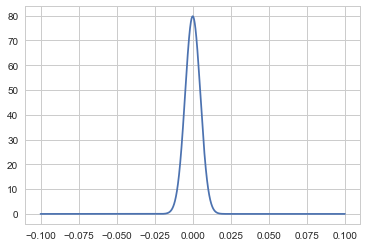

In [53]:
x = np.linspace(-0.1, 0.1, 10000000)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.show()

In [33]:
rv.rvs(size=(3,5), random_state=0)

array([[ 0.61741832,  0.14005502,  0.34255829,  0.78431262,  0.6536453 ],
       [-0.34204726,  0.33253095, -0.05297502, -0.0361266 ,  0.14370948],
       [ 0.05041525,  0.50899573,  0.2663632 ,  0.04258626,  0.15535213]])

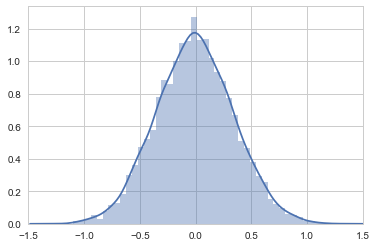

In [37]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-1.5,1.5)
plt.show()

In [66]:
theta = 0.5
rv_b = sp.stats.bernoulli(theta)

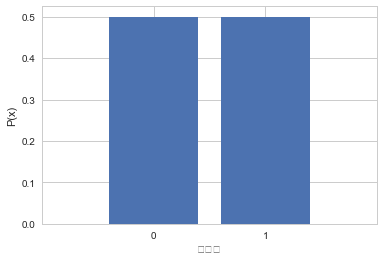

In [67]:
x = [0, 1]
plt.bar(x, rv_b.pmf(x))
plt.xlim(-1, 2)
plt.xticks([0, 1])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.show()

In [70]:
x1 = rv_b.rvs(100, random_state=0)
x1.mean(), x1.var().round(3)

(0.49, 0.25)

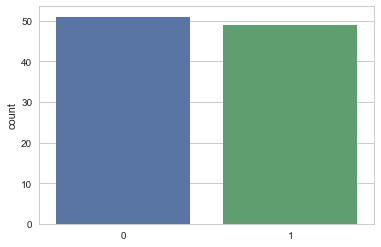

In [71]:
sns.countplot(x1)
plt.show()

In [75]:
y = np.bincount(x1)
df1 = pd.DataFrame({"이론":rv_b.pmf(x), "시뮬레이션":y}).stack().reset_index()
df1.columns = ["sample", "유형", "rate"]
df1

,표본값,유형,비율
0,0,시뮬레이션,51.0
1,0,이론,0.5
2,1,시뮬레이션,49.0
3,1,이론,0.5


In [81]:
sns.barplot(x='sample', y='rate', hue=data=df1)
plt.show()

ValueError: Could not interpret input 'sample'